<a href="https://colab.research.google.com/github/Pickles91/intrusion-detection-system-using-decision-trees/blob/main/IDS_for_R2l_with_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intrusion Detection - R2L using Descision Trees**

****

Data From https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

Attacks fall into four main categories:

*   DOS: denial-of-service, e.g. syn flood;
*   R2L: unauthorized access from a remote machine, e.g. guessing password
*   U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
*   probing: surveillance and other probing, e.g., port scanning.

This research project focuses on R2L attacks.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
with open("/content/drive/MyDrive/ids-using-dt/kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [6]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
columns.append('Attack Type')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target', 'Attack Type']
43


In [7]:
#  Reading the ‘attack_types’ file.
with open("/content/drive/MyDrive/ids-using-dt/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l



In [8]:
# Creating a dictionary of attack_types
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

for attack, type in attacks_types.items():
    print(f"{attack}: {type}")

normal: normal
back: dos
buffer_overflow: u2r
ftp_write: r2l
guess_passwd: r2l
imap: r2l
ipsweep: probe
land: dos
loadmodule: u2r
multihop: r2l
neptune: dos
nmap: probe
perl: u2r
phf: r2l
pod: dos
portsweep: probe
rootkit: u2r
satan: probe
smurf: dos
spy: r2l
teardrop: dos
warezclient: r2l
warezmaster: r2l


In [9]:
# Creating a dictionary of attack_types_r2l
attacks_types_r2l = {
    'normal': 'normal',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'multihop': 'r2l',
    'phf': 'r2l',
    'spy': 'r2l',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

for attack, type in attacks_types_r2l.items():
    print(f"{attack}: {type}")

normal: normal
ftp_write: r2l
guess_passwd: r2l
imap: r2l
multihop: r2l
phf: r2l
spy: r2l
warezclient: r2l
warezmaster: r2l


# **Analysis of R2L attacks data**

In [10]:
path = "/content/drive/MyDrive/ids-using-dt/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

In [11]:
# Define normal traffic
normal_traffic = df[df.iloc[:,41] == 'normal.']

# Define malicious traffic belonging to R2L category
ftp_write_traffic = df[df.iloc[:,41] == 'ftp_write.']
guess_passwd_traffic = df[df.iloc[:,41] == 'guess_passwd.']
imap_traffic = df[df.iloc[:,41] == 'imap.']
multihop_traffic = df[df.iloc[:,41] == 'multihop.']
phf_traffic = df[df.iloc[:,41] == 'phf.']
warezclient_traffic = df[df.iloc[:,41] == 'warezclient.']
warezmaster_traffic = df[df.iloc[:,41] == 'warezmaster.']

In [12]:
# Print the size of normal traffic
print('Normal traffic = ', normal_traffic.shape[0], ' records')
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

Normal traffic =  97278  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [13]:
# Print the size of normal traffic
print('Normal traffic = ', normal_traffic.shape[0], ' records')

# View each feature in the normal traffic
pd.DataFrame(normal_traffic).head()

Normal traffic =  97278  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,NaN
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,NaN
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,NaN
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,NaN
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,NaN


In [14]:
# Print the size of tested R2L traffic
print('ftp_write traffic = ', ftp_write_traffic.shape[0], ' records')

# View each feature in the tested R2L traffic
pd.DataFrame(ftp_write_traffic).head()

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
#df.head()

ftp_write traffic =  8  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
39564,26,tcp,ftp,SF,116,451,0,0,0,2,...,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,ftp_write.,NaN
39565,134,tcp,login,SF,100,39445,0,0,2,0,...,0.5,1.0,0.5,0.00,0.0,0.0,0.0,0.0,ftp_write.,NaN
41127,0,tcp,ftp_data,SF,613,0,0,0,0,0,...,1.0,0.0,1.0,0.02,0.0,0.0,0.0,0.0,ftp_write.,NaN
41128,0,tcp,ftp_data,SF,0,5,0,0,0,0,...,1.0,0.0,1.0,0.02,0.0,0.0,0.0,0.0,ftp_write.,NaN
43065,32,tcp,ftp,SF,104,449,0,0,0,2,...,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,ftp_write.,NaN


In [15]:
# Print the size of tested R2L traffic
print('guess_passwd traffic = ', guess_passwd_traffic.shape[0], ' records')


# View each feature in the tested R2L traffic
pd.DataFrame(guess_passwd_traffic).head()

guess_passwd traffic =  53  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
15699,23,tcp,telnet,SF,104,276,0,0,0,0,...,1.0,0.0,1.00,1.0,0.00,0.00,0.00,0.00,guess_passwd.,NaN
22750,60,tcp,telnet,S3,125,179,0,0,0,1,...,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.00,guess_passwd.,NaN
22751,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.50,0.0,0.50,0.50,0.50,0.50,guess_passwd.,NaN
22752,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.33,0.0,0.33,0.33,0.67,0.67,guess_passwd.,NaN
22753,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.25,0.0,0.25,0.25,0.75,0.75,guess_passwd.,NaN


In [16]:
# Print the size of tested R2L traffic
print('imap traffic = ', imap_traffic.shape[0], ' records')

# View each feature in the tested R2L traffic
pd.DataFrame(imap_traffic).head()

imap traffic =  12  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
40723,31,tcp,imap4,SF,1345,10036,0,0,0,0,...,0.0,0.01,0.0,0.0,0.00,0.00,0.03,0.0,imap.,NaN
76313,0,tcp,imap4,SH,0,0,0,0,0,0,...,1.0,0.00,1.0,0.0,1.00,1.00,0.00,0.0,imap.,NaN
76314,0,tcp,imap4,SH,0,0,0,0,0,0,...,1.0,0.00,1.0,0.0,1.00,1.00,0.00,0.0,imap.,NaN
76315,0,tcp,imap4,SF,0,0,0,0,0,0,...,1.0,0.00,1.0,0.0,0.67,0.67,0.00,0.0,imap.,NaN
76316,0,tcp,imap4,SF,0,0,0,0,0,2,...,1.0,0.00,1.0,0.0,0.50,0.50,0.00,0.0,imap.,NaN


In [17]:
# Print the size of tested R2L traffic
print('multihop traffic = ', multihop_traffic.shape[0], ' records')

# View each feature in the tested R2L traffic
pd.DataFrame(multihop_traffic).head()

multihop traffic =  7  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
51965,192,tcp,ftp,SF,119,426,0,0,0,2,...,0.00,0.01,0.0,0.0,0.0,0.0,0.04,0.0,multihop.,NaN
51966,179,tcp,ftp,SF,87,319,0,0,0,1,...,0.01,0.01,0.0,0.0,0.0,0.0,0.04,0.0,multihop.,NaN
53129,0,tcp,ftp_data,SF,866,0,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,multihop.,NaN
53130,0,tcp,ftp_data,SF,0,467968,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,multihop.,NaN
53131,1,tcp,ftp_data,SF,0,988002,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,multihop.,NaN


In [18]:
# Print the size of tested R2L traffic
print('phf traffic = ', phf_traffic.shape[0], ' records')

# View each feature in the tested R2L traffic
pd.DataFrame(phf_traffic).head()

phf traffic =  4  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
42057,0,tcp,http,SF,51,8127,0,0,0,2,...,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,phf.,NaN
78529,12,tcp,http,SF,51,8127,0,0,0,2,...,0.96,0.01,0.0,0.0,0.0,0.0,0.0,0.0,phf.,NaN
86543,0,tcp,http,SF,51,8127,0,0,0,2,...,0.95,0.01,0.0,0.0,0.0,0.0,0.0,0.0,phf.,NaN
452731,6,tcp,http,SF,51,8127,0,0,0,2,...,0.98,0.01,0.0,0.0,0.0,0.0,0.0,0.0,phf.,NaN


In [19]:
# Print the size of tested R2L traffic
print('warezclient traffic = ', warezclient_traffic.shape[0], ' records')

# View each feature in the tested R2L traffic
pd.DataFrame(warezclient_traffic).head()

warezclient traffic =  1020  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
140030,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,warezclient.,NaN
140031,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,warezclient.,NaN
140032,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,warezclient.,NaN
140033,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,warezclient.,NaN
140128,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,warezclient.,NaN


In [20]:
# Print the size of tested R2L traffic
print('warezmaster traffic = ', warezmaster_traffic.shape[0], ' records')

# View each feature in the tested R2L traffic
pd.DataFrame(warezmaster_traffic).head()

warezmaster traffic =  20  records


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
74079,0,tcp,ftp,SF,36,197,0,0,0,0,...,0.0,0.05,0.0,0.0,0.39,0.0,0.05,0.0,warezmaster.,NaN
76125,156,tcp,ftp,SF,950,2551,0,0,0,18,...,0.0,0.03,0.0,0.0,0.01,0.0,0.07,0.0,warezmaster.,NaN
77144,0,tcp,ftp_data,SF,0,7181,0,0,0,0,...,1.0,0.00,1.0,0.0,0.00,0.0,0.00,0.0,warezmaster.,NaN
77145,0,tcp,ftp_data,SF,0,848,0,0,0,0,...,1.0,0.00,1.0,0.0,0.00,0.0,0.00,0.0,warezmaster.,NaN
77146,9,tcp,ftp_data,SF,0,5153460,0,0,0,0,...,1.0,0.00,1.0,0.0,0.00,0.0,0.00,0.0,warezmaster.,NaN


In [21]:
# Print the size of normal traffic
print('Normal traffic = ', normal_traffic.shape[0], ' records')

print()

# Print the size of tested R2L traffic
print('ftp_write traffic = ', ftp_write_traffic.shape[0], ' records')
print('guess_passwd traffic = ', guess_passwd_traffic.shape[0], ' records')
print('imap traffic = ', imap_traffic.shape[0], ' records')
print('multihop traffic = ', multihop_traffic.shape[0], ' records')
print('phf traffic = ', phf_traffic.shape[0], ' records')
print('warezclient traffic = ', warezclient_traffic.shape[0], ' records')
print('warezmaster traffic = ', warezmaster_traffic.shape[0], ' records')

Normal traffic =  97278  records

ftp_write traffic =  8  records
guess_passwd traffic =  53  records
imap traffic =  12  records
multihop traffic =  7  records
phf traffic =  4  records
warezclient traffic =  1020  records
warezmaster traffic =  20  records


In [22]:
# Combine normal traffic and tested R2L traffic
full_traffic = np.concatenate([normal_traffic, ftp_write_traffic, guess_passwd_traffic, imap_traffic, multihop_traffic, phf_traffic, warezclient_traffic, warezmaster_traffic ], axis=0)

# Print the size of full traffic
print('Size of full traffic = ', full_traffic.shape[0], ' records')


Size of full traffic =  98402  records


In [23]:
# Shape of dataframe and getting data type of each feature
df.shape

(494021, 43)

In [24]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [25]:
#  Finding missing values of all features.
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [26]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

<ipython-input-27-ad4b7348d31a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-27-ad4b7348d31a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


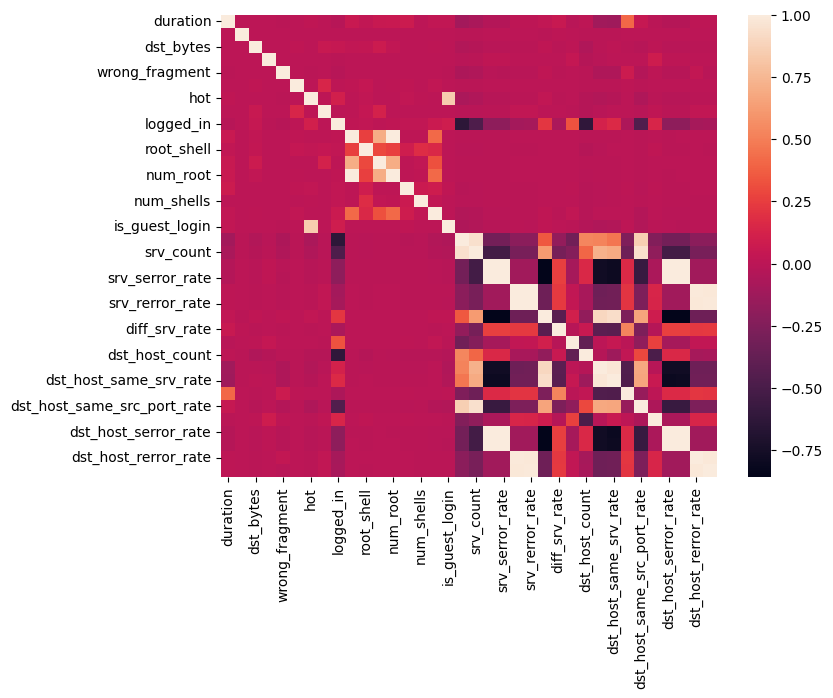

In [27]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

df = df.dropna('columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = df.corr()
plt.figure(figsize =(8, 6))
sns.heatmap(corr)
plt.show()

In [28]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [29]:
# Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [30]:
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [31]:
# Remove irrelevant features such as ‘service’ before modelling
df.drop('service', axis = 1, inplace = True)

# **Splitting the dataset**

In [32]:
# splitting the dataset of only the normal and R2L attacks then train the dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate the normal and R2L attack records
normal_r2l = df[df['target'].isin(['normal.', 'ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'])]

# Separate the features and target labels
X_r2l = normal_r2l.drop('target', axis=1)
y_r2l = normal_r2l['target']

# Split the data into training and testing sets
X_train_r2l, X_test_r2l, y_train_r2l, y_test_r2l = train_test_split(X_r2l, y_r2l, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print(f"Shape of X_train_r2l: {X_train_r2l.shape}")
print(f"Shape of X_test_r2l: {X_test_r2l.shape}")
print(f"Shape of y_train_r2l: {y_train_r2l.shape}")
print(f"Shape of y_test_r2l: {y_test_r2l.shape}")


Shape of X_train_r2l: (68882, 31)
Shape of X_test_r2l: (29522, 31)
Shape of y_train_r2l: (68882,)
Shape of y_test_r2l: (29522,)


# **Decision Tree Classifier**

In [34]:
# Accuracy of R2L attacks

model = DecisionTreeClassifier()

# One-hot encode the categorical features
X_r2l_encoded = pd.get_dummies(X_r2l)

# Now split the data into training and testing sets
X_train_r2l, X_test_r2l, y_train_r2l, y_test_r2l = train_test_split(X_r2l_encoded, y_r2l, test_size=0.3, random_state=42)

# Then you can fit your model
model.fit(X_train_r2l, y_train_r2l)
y_pred_r2l = model.predict(X_test_r2l)
accuracy_r2l = accuracy_score(y_test_r2l, y_pred_r2l)
print(f"Accuracy of R2L attacks: {accuracy_r2l}")


Accuracy of R2L attacks: 0.999762888693178


In [37]:
# Classification Report: A Classification report is used to measure the quality of predictions from a classification algorithm. It shows the precision, recall, F1, and support scores for the model.
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test_r2l, y_pred_r2l))

               precision    recall  f1-score   support

   ftp_write.       0.67      0.40      0.50         5
guess_passwd.       1.00      1.00      1.00        17
        imap.       0.67      0.67      0.67         3
    multihop.       0.43      1.00      0.60         3
      normal.       1.00      1.00      1.00     29172
         phf.       1.00      1.00      1.00         1
 warezclient.       1.00      1.00      1.00       314
 warezmaster.       1.00      0.57      0.73         7

     accuracy                           1.00     29522
    macro avg       0.84      0.83      0.81     29522
 weighted avg       1.00      1.00      1.00     29522



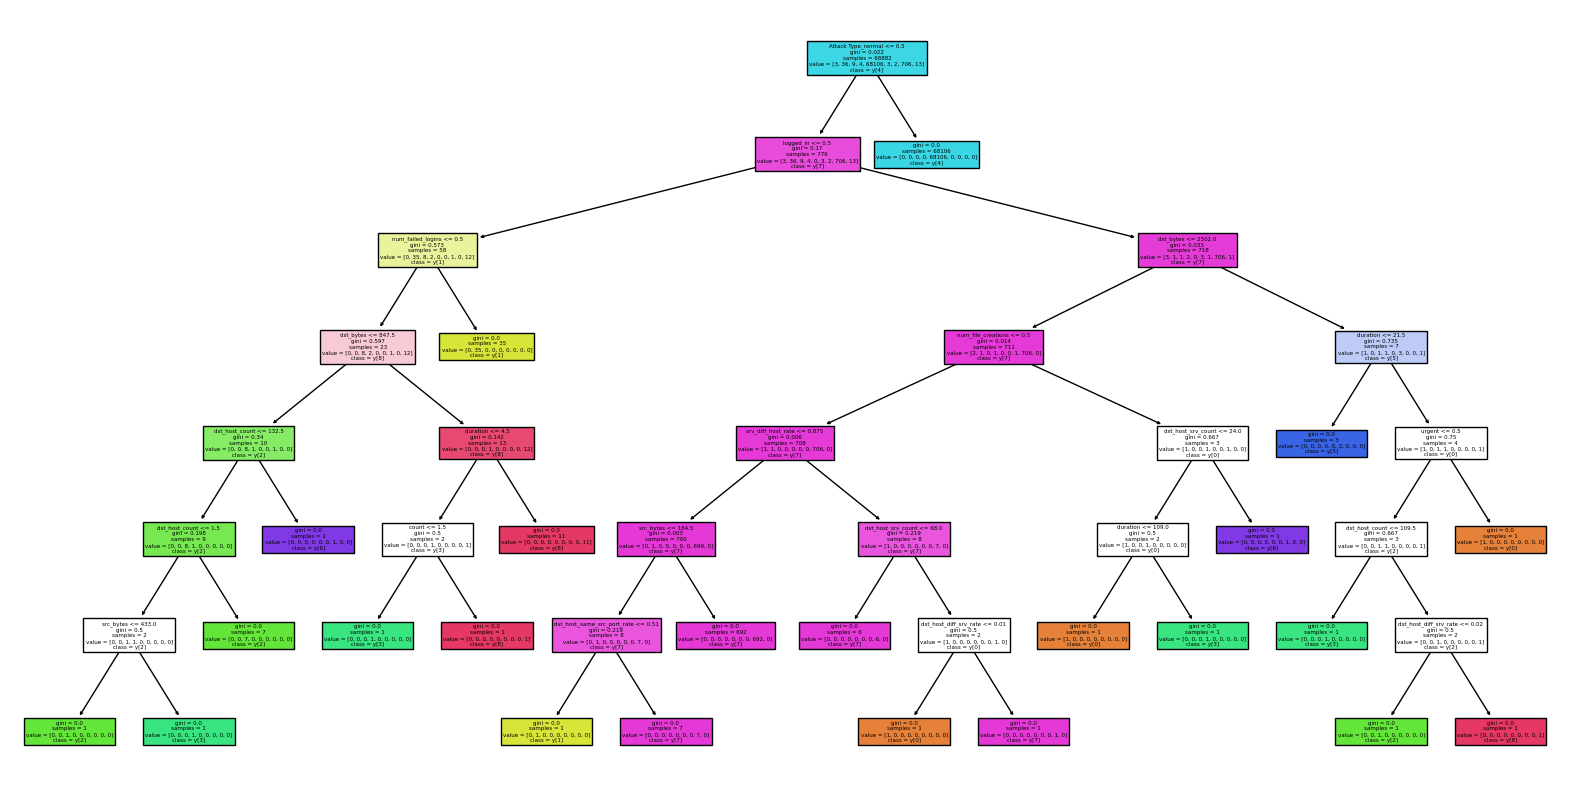

In [35]:
# Decision tree plot
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train_r2l.columns, class_names=True)
plt.show()

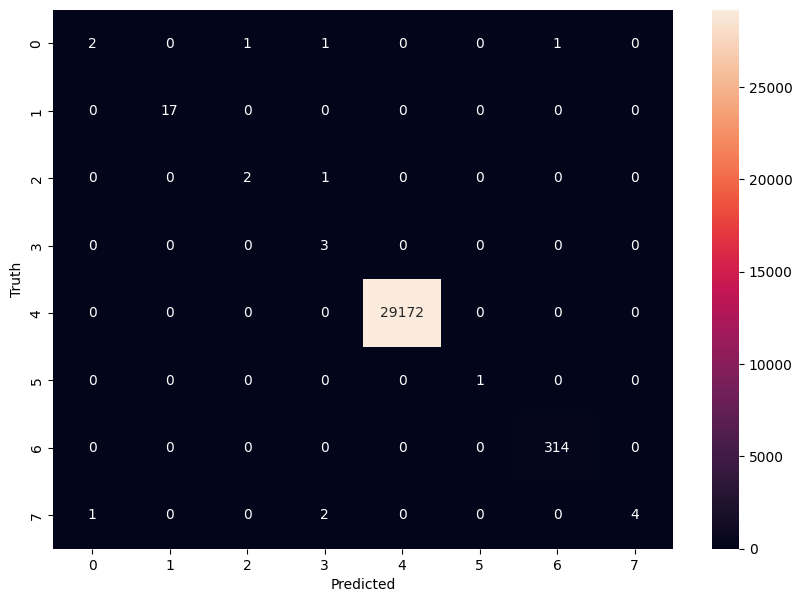

In [39]:
# Confusion Matrix: A confusion matrix is a table that is often used to describe the performance of a classification model. It can provide insights not just into the errors being made by your classifier but more importantly the types of errors that are being made.

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_r2l, y_pred_r2l)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()